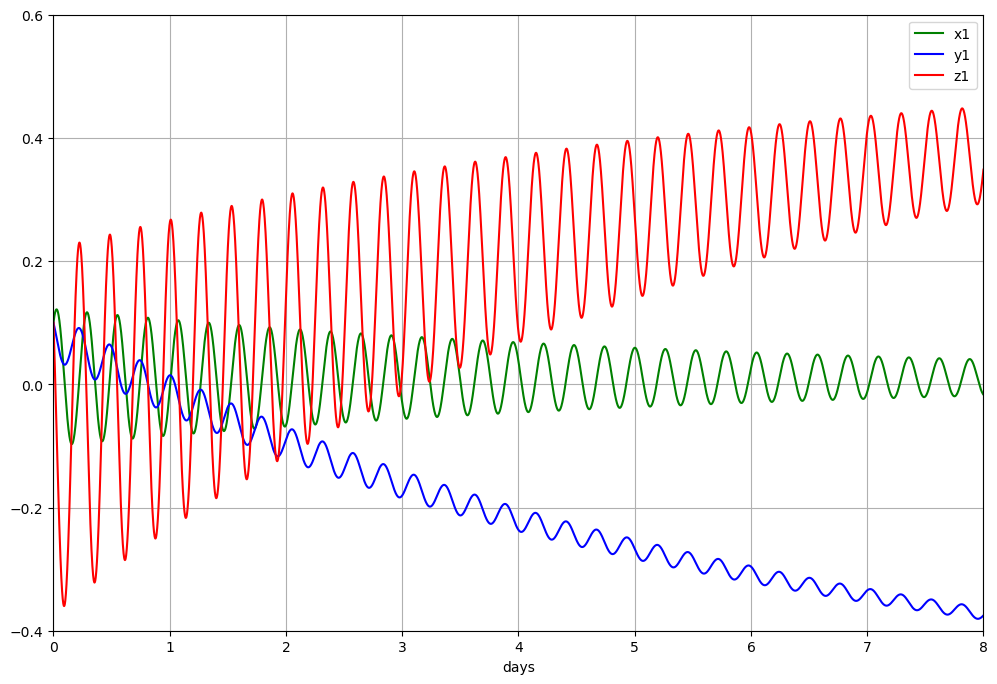

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes e parâmetros iniciais
vetor_a = [1, 1, 3]
vetor_b = [
    1/2 * (vetor_a[0] - vetor_a[1] - vetor_a[2]),
    1/2 * (vetor_a[1] - vetor_a[2] - vetor_a[0]),
    1/2 * (vetor_a[2] - vetor_a[0] - vetor_a[1])
]
c = np.sqrt(3/2)

f_inv = 3 # arrumar
vetor_h = [-1, 0, 0]
vetor_f = [0.1, 0, 0]
g_0 = 8
kappa_0 = 1/48
nu_0 = kappa_0
 

def calculate_UV(X, Y):
    U = []
    V = []
    for i in range(3):
        if i == 0:
            j, k = 1, 2
        elif i == 1:
            j, k = 2, 0
        else:
            j, k = 0, 1
        
        U.append(-vetor_b[j] * X[i] + c * Y[i])
        V.append(-vetor_b[k] * X[i] - c * Y[i])
    return U, V

def derivatives(X, Y, Z):
    U, V = calculate_UV(X, Y)
    dX = []
    dY = []
    dZ = []
    for i in range(3):
        
        if i == 0:
            j, k = 1, 2
        elif i == 1:
            j, k = 2, 0
        else:
            j, k = 0, 1

        dX.append(U[j] * U[k] + V[j] * V[k] - nu_0 * vetor_a[i] * X[i] + Y[i] + vetor_a[i] * Z[i])
        dY.append(U[j] * Y[k] + Y[j] * V[k] - X[i] - nu_0 * vetor_a[i] * Y[i])
        dZ.append(U[j] * (Z[k] - vetor_h[k]) + (Z[j] - vetor_h[j]) * V[k] - g_0 * X[i] - kappa_0 * vetor_a[i] * Z[i] + vetor_f[i])
    return np.array(dX), np.array(dY), np.array(dZ)

def runge_kutta(dias):
    t = dias * 8 
    dt_adim = 1/96
    n_steps = int(t / dt_adim)
    
    t = np.linspace(0, t, n_steps)
    X = np.zeros((n_steps, 3))
    Y = np.zeros((n_steps, 3))
    Z = np.zeros((n_steps, 3))
    
    X[0] = [0.1, 0, 0]
    Y[0] = [0.1, 0, 0]
    Z[0] = [0.1, 0, 0]
    
    for i in range(1, n_steps):
        dx1, dy1, dz1 = derivatives(X[i-1], Y[i-1], Z[i-1])
        k1x = dt_adim * dx1
        k1y = dt_adim * dy1
        k1z = dt_adim * dz1
        
        dx2, dy2, dz2 = derivatives(X[i-1] + k1x/2, Y[i-1] + k1y/2, Z[i-1] + k1z/2)
        k2x = dt_adim * dx2
        k2y = dt_adim * dy2
        k2z = dt_adim * dz2
        
        dx3, dy3, dz3 = derivatives(X[i-1] + k2x/2, Y[i-1] + k2y/2, Z[i-1] + k2z/2)
        k3x = dt_adim * dx3
        k3y = dt_adim * dy3
        k3z = dt_adim * dz3
        
        dx4, dy4, dz4 = derivatives(X[i-1] + k3x, Y[i-1] + k3y, Z[i-1] + k3z)
        k4x = dt_adim * dx4
        k4y = dt_adim * dy4
        k4z = dt_adim * dz4
        
        X[i] = X[i-1] + (k1x + 2*k2x + 2*k3x + k4x)/6
        Y[i] = Y[i-1] + (k1y + 2*k2y + 2*k3y + k4y)/6
        Z[i] = Z[i-1] + (k1z + 2*k2z + 2*k3z + k4z)/6

    t_days = t / 8
    return t_days, X, Y, Z

def plot2d(t, X, Y, Z, dias):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.plot(t, X[:, 0], '-', linewidth=1.5, label='x1', color='green')
    ax.plot(t, Y[:, 0], '-', linewidth=1.5, label='y1', color='blue')
    ax.plot(t, Z[:, 0], '-', linewidth=1.5, label='z1', color='red')
    
    ax.set_xlim(0, dias)  
    ax.set_ylim(-0.4, 0.6)
    ax.set_xlabel('days')
    ax.grid(True)
    ax.legend()
    
    return fig, ax

def main():
    dias_simulacao = 8
    dias = dias_simulacao
    t, X, Y, Z = runge_kutta(dias_simulacao)

    plot2d(t, X, Y, Z, dias)

if __name__ == '__main__':
    main()


    ## acho que tem um problema em relação ao tempo...